<a href="https://colab.research.google.com/github/19521242bao/CS231/blob/main/BT4/CV_BT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                          
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!mkdir ComputerVision

In [ ]:
%cd /content/gdrive/MyDrive/ComputerVision


/content/gdrive/MyDrive/ComputerVision


In [ ]:
# Import libs
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models
from torch.autograd import Variable
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
from numpy.fft import rfft2, irfft2
from sklearn import svm
import cv2
from matplotlib import pyplot as plt
import joblib

In [ ]:
model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
new_classifier = nn.Sequential(*list(model.classifier.children())[:-1])
model.classifier = new_classifier

In [ ]:
preprocess = transforms.Compose([
       transforms.Scale(256),
       transforms.CenterCrop(227),
       transforms.ToTensor()
    ])

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [ ]:
# Loading train data label 
train_image_names = []
y_train = []
import os
for file in os.listdir("dog"):
  train_image_names.append(file)
  y_train.append(0)
for file in os.listdir("cat"):
  train_image_names.append(file)
  y_train.append(1)
num_train = len(y_train)
print(num_train)

400


In [ ]:
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# Obtaining features for train images
features=[]
dir=""
for i in range(num_train):
    if y_train[i]==0:
      dir="dog"
    else:
      dir="cat"
    img_pil = Image.open(dir+"/" + train_image_names[i])
    img_tensor = preprocess(img_pil)
    img_tensor.unsqueeze_(0)
    img_var = Variable(img_tensor)
    out = model(img_var)
    newOut = np.squeeze(out)
    features.append(np.squeeze(out.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
import numpy as np

from sklearn import svm
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(features, y_train, test_size = 0.2, random_state = 42 )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Train score:  1.0
Test score:  0.8625
Confusion matrix, without normalization
[[37  7]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.82      0.89      0.85        36

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



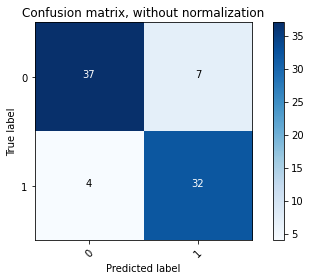

In [ ]:
# SVM classifier for best value of the hyperparameter C
clf = svm.SVC(  kernel = 'linear')
clf.fit( x_train, Y_train )
print("Train score: ", clf.score(x_train, Y_train))
print("Test score: ",clf.score(x_test,Y_test))
y_pred=clf.predict(x_test)
cnf_matrix_nb = confusion_matrix(Y_test, y_pred, labels=[0, 1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_nb, classes=[0, 1],
                      title='Confusion matrix, without normalization')
print(classification_report(Y_test, y_pred,target_names=[ '0', '1']))

In [ ]:

joblib.dump(clf, 'SVM1.pkl')

['SVM1.pkl']

In [ ]:
clf=joblib.load("SVM1.pkl")

In [ ]:

def showImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


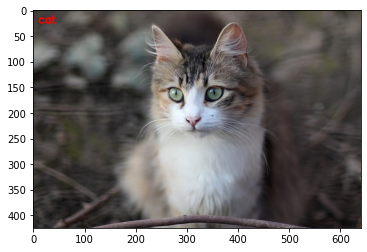

In [ ]:
img_name="3.jpg"


In [ ]:
test_file=["test"+str(i)+".jpg" for i in range(1,11)]

In [ ]:
def ShowResult(img_name):
  img=cv2.imread(img_name)
  from PIL import Image
  import requests

  #img_pil = Image.open(requests.get(url, stream=True).raw)
  img_pil = Image.open(img_name)

  # img_pil = Image.open('/Users/sahilmishra/Desktop/Pictures/Dataset/image178.jpg')
  preprocess = transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(227),
        transforms.ToTensor()])
  img_tensor = preprocess(img_pil)
  img_tensor.unsqueeze_(0)

  img_var = Variable(img_tensor)
  out = model(img_var)
      # print type(out)
      # print out
  newOut = np.squeeze(out)
  pred = clf.predict(out.data.numpy())
  text="cat"
  if pred==0:
    text="dog"
  cv2.putText(img,text,(10, 25),cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255), 2)
  showImage(img)


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


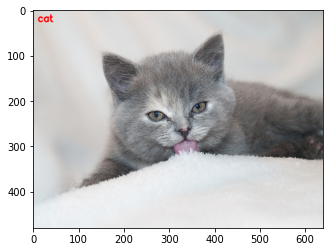

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


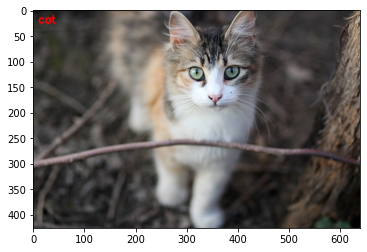

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


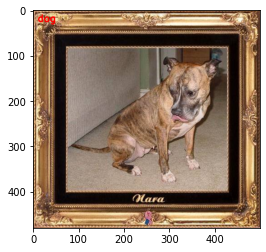

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


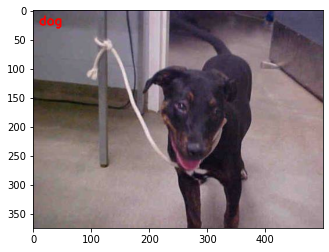

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


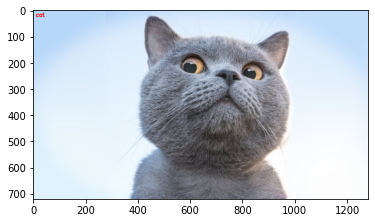

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


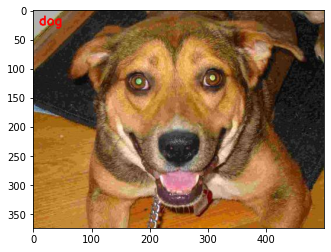

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


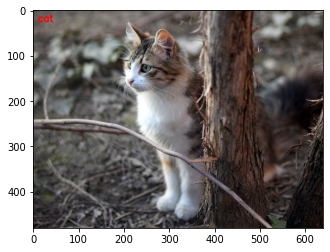

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


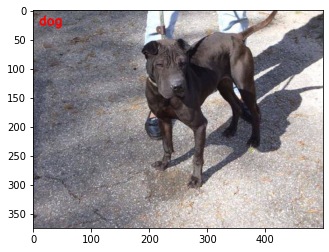

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


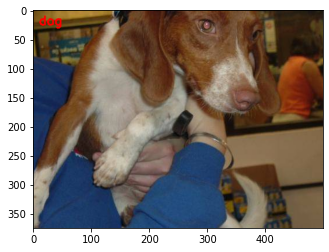

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


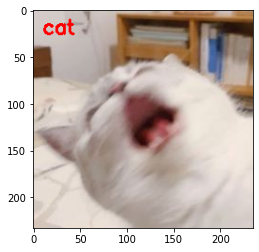

In [ ]:
for  img_name in test_file:
  ShowResult(img_name)